In [122]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline

In [123]:
df = pd.read_csv("electricBill.csv")
print("="*50)
print("First Five Rows ","\n")
print(df.head(2),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

First Five Rows  

         Date  Consumed Units  Unit Price  Total Price
0  01-04-2019            1347        7.04      9482.88
1  02-09-2019            1219        7.04      8581.76 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            24 non-null     object 
 1   Consumed Units  24 non-null     int64  
 2   Unit Price      24 non-null     float64
 3   Total Price     24 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 896.0+ bytes
None 

Describe the Dataset  

       Consumed Units  Unit Price   Total Price
count       24.000000       24.00     24.000000
mean      1163.125000        7.04   8188.400000
std        179.666191        0.00   1264.849985
min        912.000000        7.04   6420.480000
25%        984.250000        7.04   6929.120000
50%       1162.000000       

In [7]:
dataset = df
dataset["Month"] = pd.to_datetime(df["Date"]).dt.month
dataset["Year"] = pd.to_datetime(df["Date"]).dt.year
dataset["Date"] = pd.to_datetime(df["Date"]).dt.date
dataset["Week"] = pd.to_datetime(df["Date"]).dt.week
dataset["Day"] = pd.to_datetime(df["Date"]).dt.day_name()
dataset = df.set_index("Date")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(14)

,Consumed Units,Unit Price,Total Price,Month,Year,Week,Day
Date,,,,,,,
2019-01-04,1347,7.04,9482.88,1,2019,1,Friday
2019-02-09,1219,7.04,8581.76,2,2019,6,Saturday
2019-03-09,1109,7.04,7807.36,3,2019,10,Saturday
2019-04-09,988,7.04,6955.52,4,2019,15,Tuesday
2019-05-09,954,7.04,6716.16,5,2019,19,Thursday
2019-06-09,1433,7.04,10088.32,6,2019,23,Sunday
2019-07-09,1349,7.04,9496.96,7,2019,28,Tuesday
2019-08-09,1134,7.04,7983.36,8,2019,32,Friday
2019-09-09,965,7.04,6793.60,9,2019,37,Monday


No handles with labels found to put in legend.


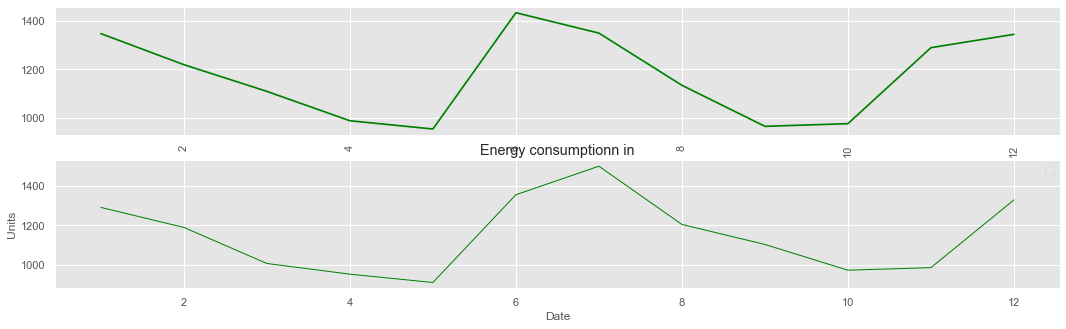

In [18]:
from matplotlib import style


fig = plt.figure()

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)

style.use('ggplot')

y_2019 = dataset["2019"]["Consumed Units"].to_list()
x_2019 = dataset["2019"]["Month"].to_list()
ax1.plot(x_2019,y_2019, color="green", linewidth=1.7)


y_2020 = dataset["2020"]["Consumed Units"].to_list()
x_2020 = dataset["2020"]["Month"].to_list()
ax2.plot(x_2020, y_2020, color="green", linewidth=1)


plt.rcParams["figure.figsize"] = (18,8)
plt.title("Energy consumptionn in")
plt.xlabel("Date")
plt.ylabel("Units")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

Text(0.5, 1.0, 'Energy Distribution')

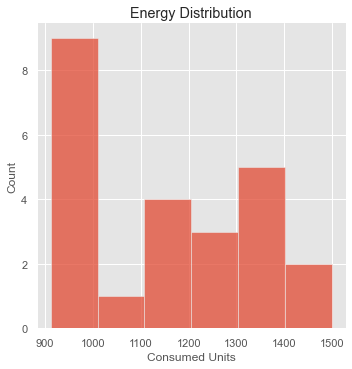

In [19]:
sns.displot(dataset["Consumed Units"])
plt.title("Energy Distribution")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Energy Consumption According to Day')

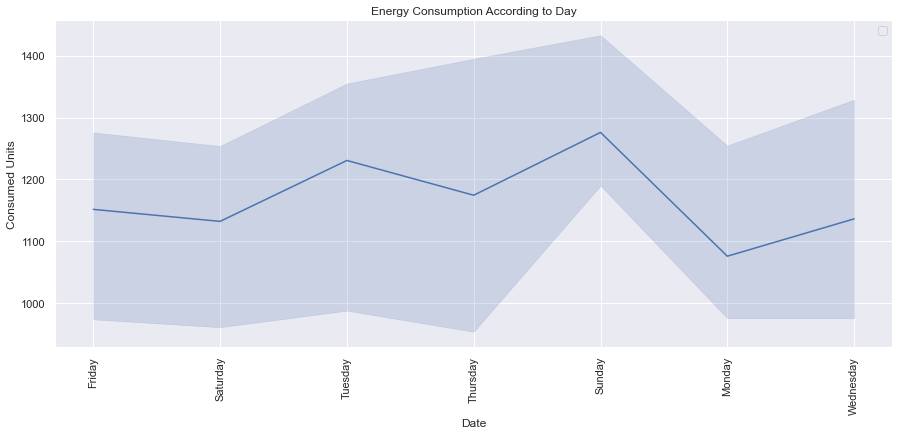

In [121]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Day"], y=dataset["Consumed Units"], data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy consumptionnin Year 2019-20")
plt.xlabel("Date")
plt.ylabel("Consumed Units")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Day")

In [ ]:
X = dataset[['Month']].values
Y = dataset[['Consumed Units']].values

In [114]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 1/3, random_state=0)  

In [115]:
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x_train, y_train) 

LinearRegression()

[[1165.52922756]
 [1107.39561587]
 [1136.46242171]
 [1150.99582463]
 [1165.52922756]
 [1194.5960334 ]
 [1150.99582463]
 [1136.46242171]
 [1092.86221294]
 [1121.92901879]
 [1121.92901879]
 [1180.06263048]
 [1223.66283925]
 [1092.86221294]
 [1180.06263048]
 [1223.66283925]]


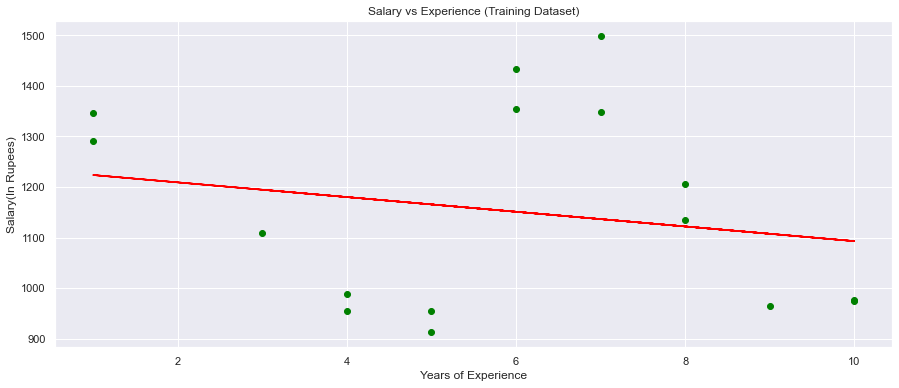

In [118]:
import matplotlib.pyplot as mtp
mtp.scatter(x_train, y_train, color="green")   
mtp.plot(x_train, x_pred, color="red")    
mtp.title("Salary vs Experience (Training Dataset)")  
mtp.xlabel("Years of Experience")  
mtp.ylabel("Salary(In Rupees)")  
mtp.show()

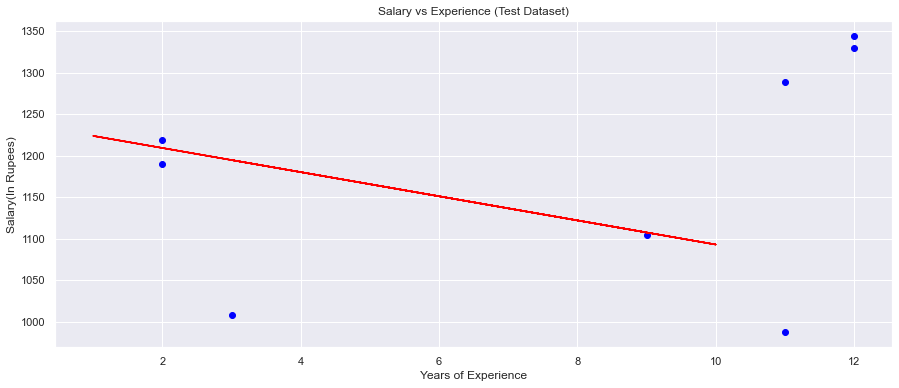

In [119]:
#visualizing the Test set results  
mtp.scatter(x_test, y_test, color="blue")   
mtp.plot(x_train, x_pred, color="red")    
mtp.title("Salary vs Experience (Test Dataset)")  
mtp.xlabel("Years of Experience")  
mtp.ylabel("Salary(In Rupees)")  
mtp.show()  